#Problem STAtement
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, 
not just this but there are training programs within the companies for their existing employees as well. The aim of these 
programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about 
improving the performance of employees?

HR Analytics-Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic
processes to the human resource department of an organization in the hope of improving employee performance and therefore 
getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. 
Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about 
how to improve these processes.

In [2]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Importing dataset
path = r"C:\Users\Rahul\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(path)
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [4]:
df.shape

(1470, 35)

In [5]:
#Their are 1470 rows and 35 columns in dataset

In [6]:
#for displaying max. rows
pd.set_option('display.max_rows', None)

In [7]:
# checking Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
#checking datatype
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
#Two types of data type present in dataset. 1. integer, 2. object

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

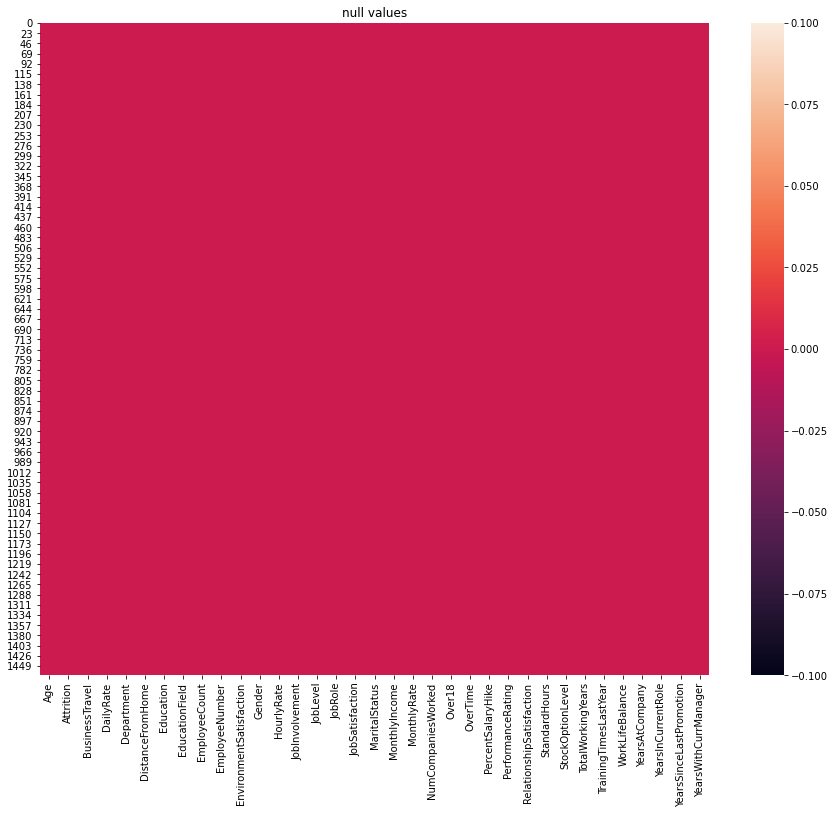

In [11]:
#Heatmap for checking null values
plt.figure(figsize = [15,12])
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()

In [12]:
# for checking for null values- no null values is observed in dataset as no whitelines are visible in map, also null value sum is 0 for all coloumns

In [13]:
#Converting object type data into integers
encode = LabelEncoder() 
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=encode.fit_transform(df[i])

In [14]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
5      32          0               1       1005           1                 2   
6      59          0               2       1324           1                 3   
7      30          0               2       1358           1                24   
8      38          0               1        216           1                23   
9      36          0               2       1299           1                27   
10     35          0               2        809           1                16   
11     29          0               2        153           1                15   
12     31          0               2        670           1                26   
13     34          0               2       1346           1                19   
14     28          1               2        103           1                24   
15     29          0               2       1389           1                21   
16     32          0               2        334           1                 5   
17     22          0               0       1123           1                16   
18     53          0               2       1219           2                 2   
19     38          0               2        371           1                 2   
20     24          0               0        673           1                11   
21     36          1               2       1218           2                 9   
22     34          0               2        419           1                 7   
23     21          0               2        391           1                15   
24     34          1               2        699           1                 6   
25     53          0               2       1282           1                 5   
26     32          1               1       1125           1                16   
27     42          0               2        691           2                 8   
28     44          0               2        477           1                 7   
29     46          0               2        705           2                 2   
30     33          0               2        924           1                 2   
31     44          0               2       1459           1                10   
32     30          0               2        125           1                 9   
33     39          1               2        895           2                 5   
34     24          1               2        813           1                 1   
35     43          0               2       1273           1                 2   
36     50          1               2        869           2                 3   
37     35          0               2        890           2                 2   
38     36          0               2        852           1                 5   
39     33          0               1       1141           2                 1   
40     35          0               2        464           1                 4   
41     27          0               2       1240           1                 2   
42     26          1               2       1357           1                25   
43     27          0               1        994           2                 8   
44     30          0               1        721           1                 1   
45     41          1               2       1360           1                12   
46     34          0               0       1065           2                23   
47     37          0               2        408           1                19   
48     46          0               1 

In [15]:
#checking columns name
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [16]:
#multivariate analysis
corr_mat=df.corr()
corr_mat

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EmployeeCount                  NaN        NaN             NaN        NaN   
EmployeeNumber           -0.010145  -0.010577       -0.015578  -0.050990   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
Over18                         NaN        NaN             NaN        NaN   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StandardHours                  NaN        NaN             NaN        NaN   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EmployeeCount                    NaN               NaN        NaN   
EmployeeNumber             -0.010895          0.032916   0.042070   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.0144

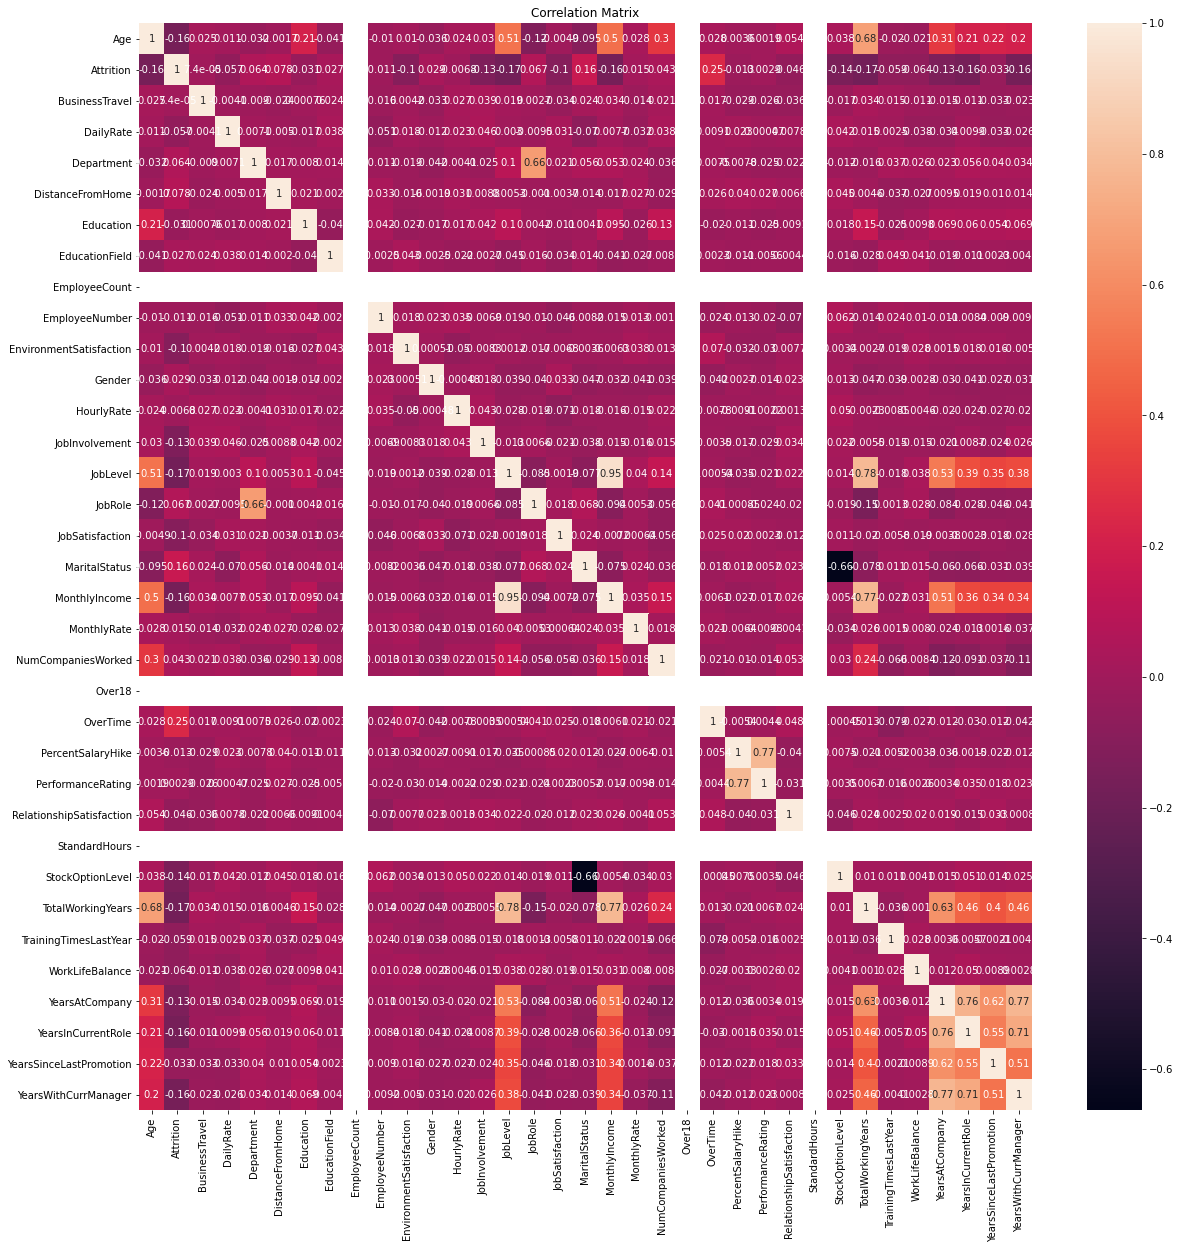

In [17]:
# heatmap for analysing correlation
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [18]:
#for better understanding correalation with target col.
corr_mat=df.corr()
corr_mat["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

In [19]:
# highest correaltion is shown with overtime column, most of the colunms shown -ve correlation with target column.
# Also three columns doesnt shown any correaltion with target column i.e. Employpeecount, Over18, StandardHours

In [20]:
# droping col having no correlation with target col.
del df['EmployeeCount']
del df['Over18']
del df['StandardHours']

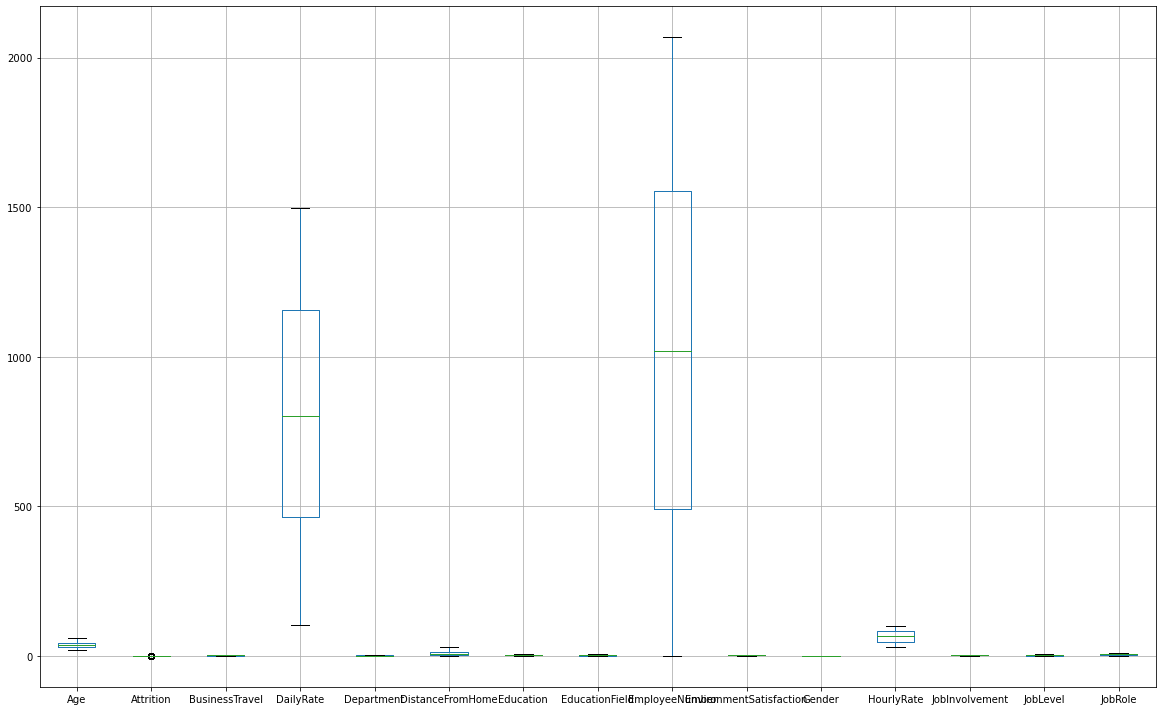

In [21]:
#Checking outliers
df.iloc[:,0:15].boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

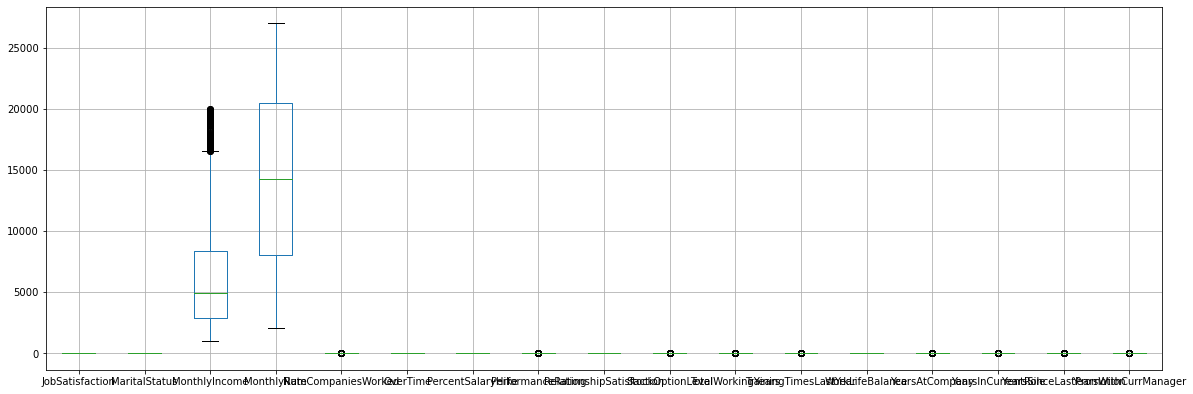

In [22]:
df.iloc[:,15:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
#outliers is presnt in many columns, need to remove outliers

In [23]:
#removing outliers using z-score method
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [24]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new.shape)
print("Percentage Loss".ljust(20),":",(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (1470, 32)
shape after          : (1387, 32)
Percentage Loss      : 0.05646258503401361


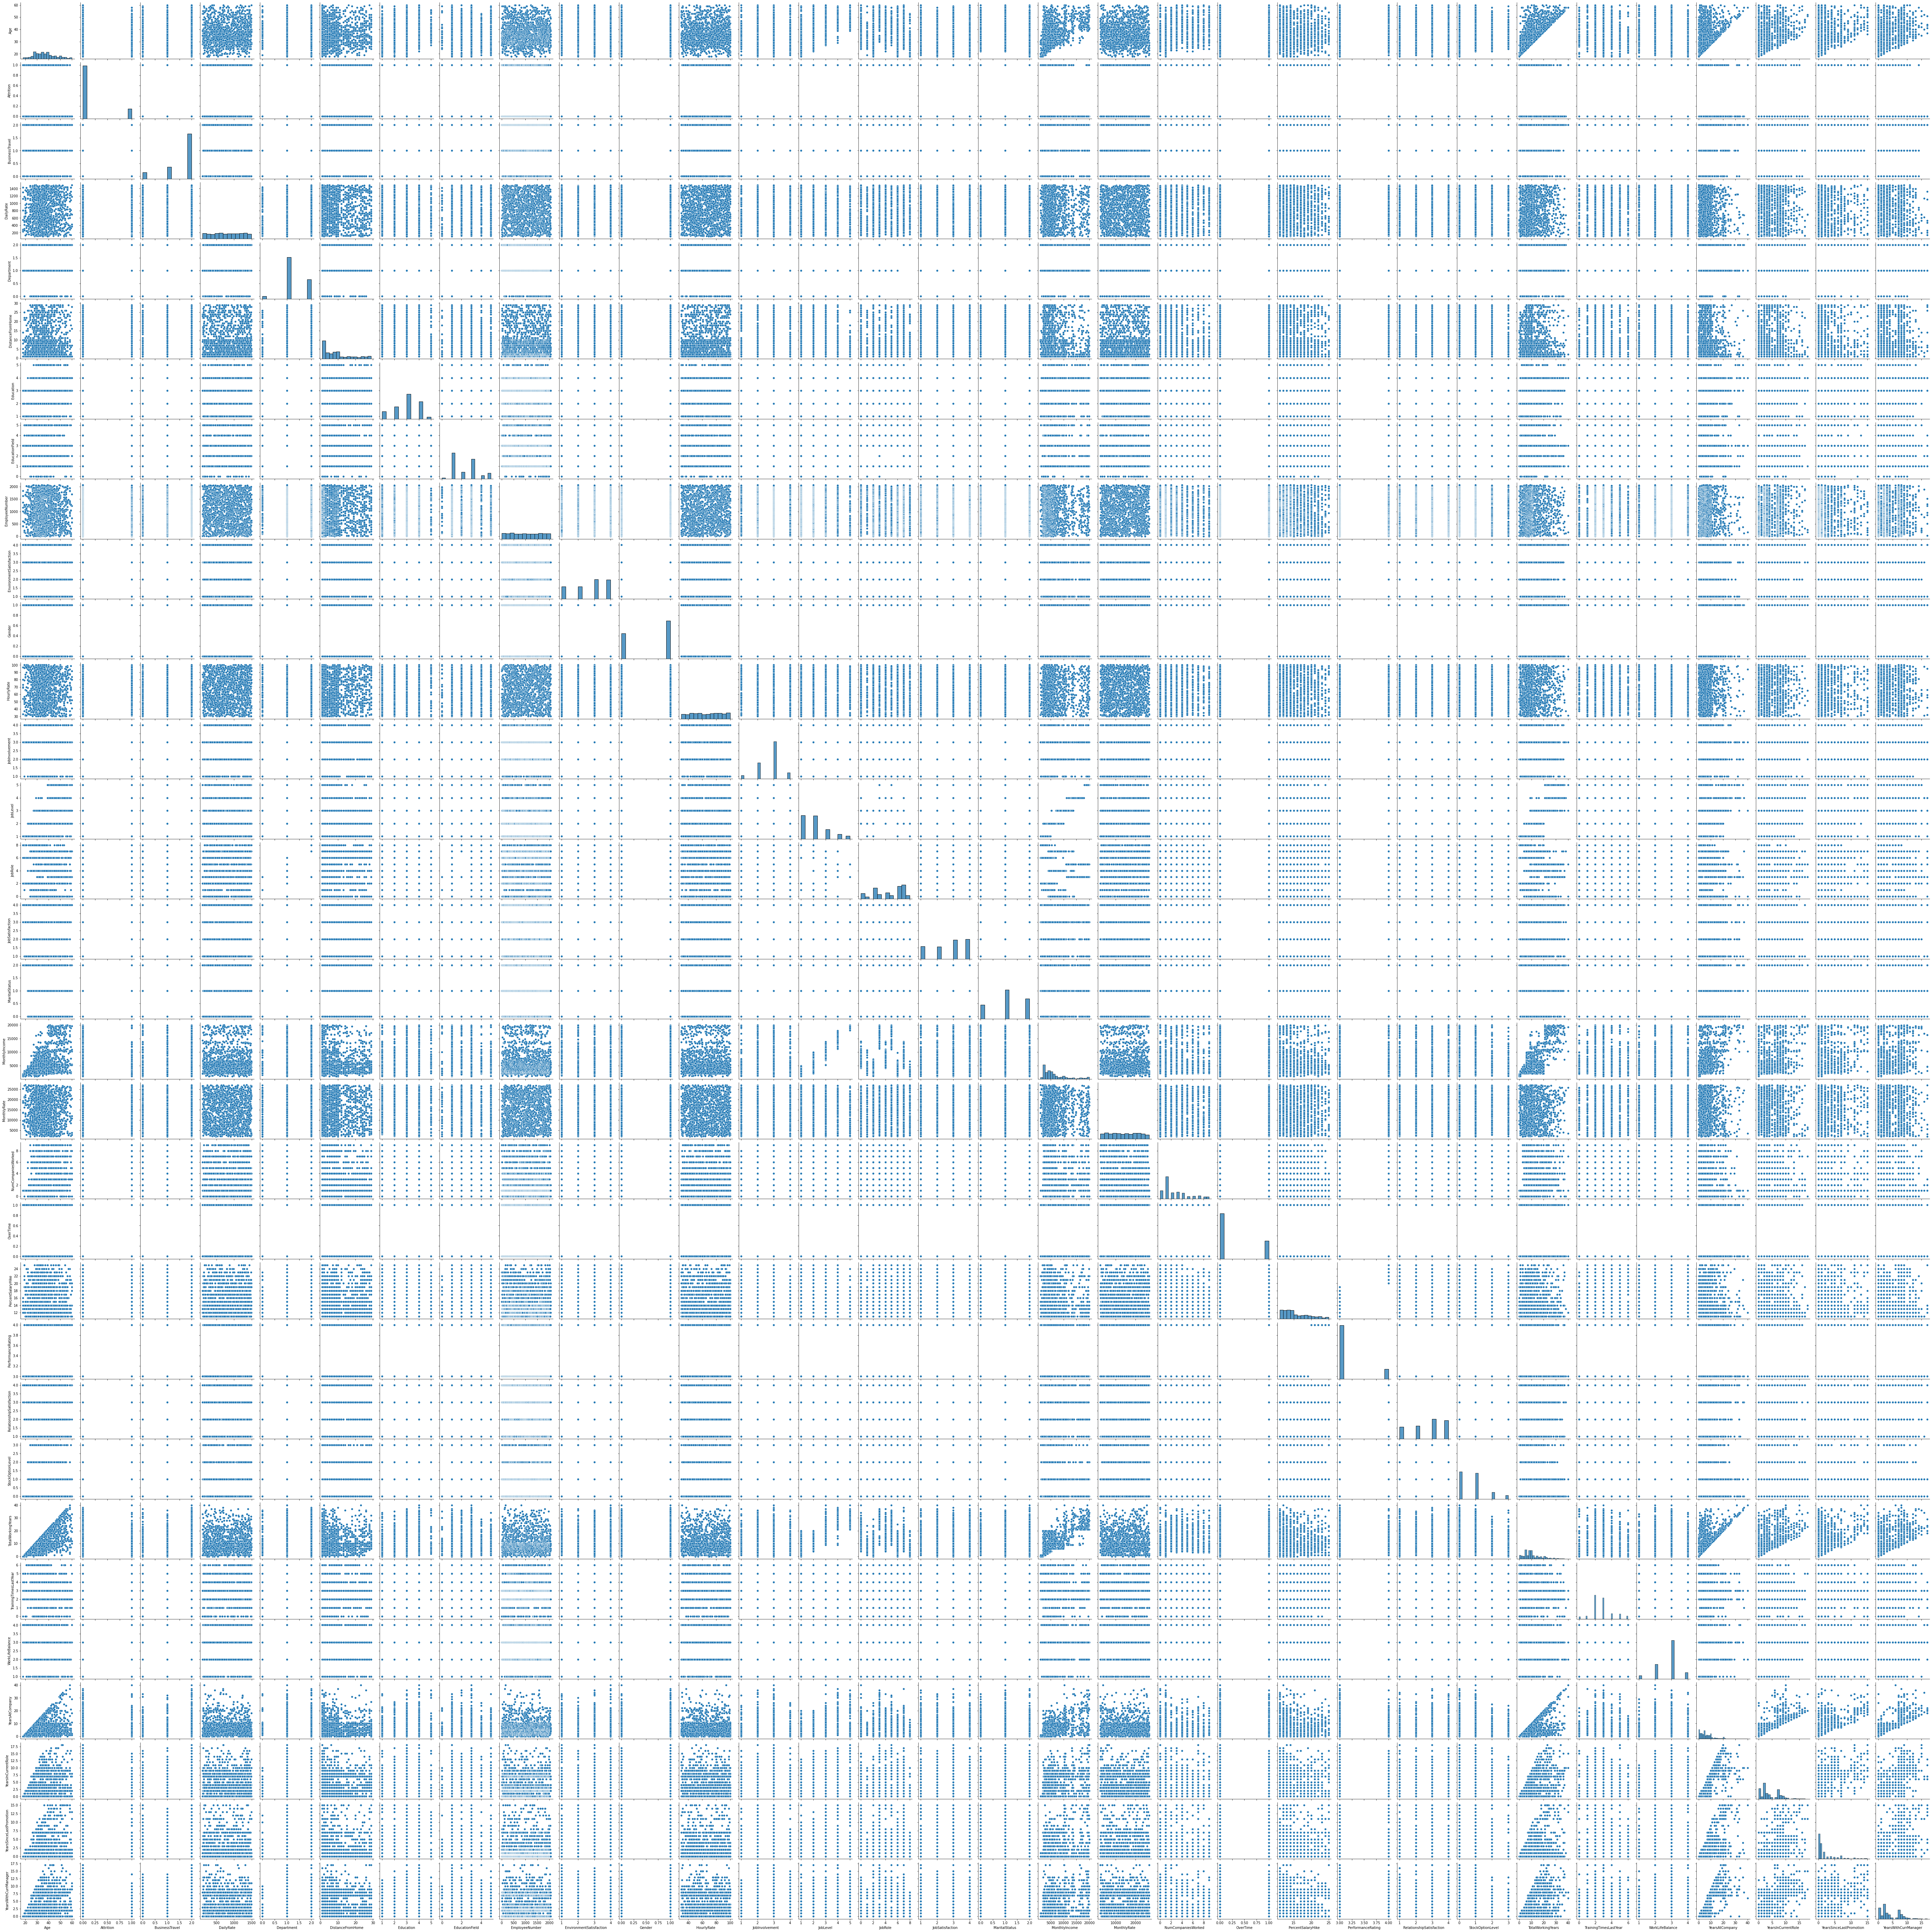

In [25]:
sns.pairplot(df)
plt.show()

In [26]:
#splitling into tRain and test
from sklearn.model_selection import train_test_split
df_new.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [27]:
df_new=df_new[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]     

In [28]:
x=df_new.iloc[:,:-1].values
y=df_new.iloc[:,-1].values

In [29]:
#check Skewness
df_new.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [ ]:
#skewness is shown in many colunms, such as BussinessTravel, Distance from home, Performace rating, Job Level, Monthly income, no. of companies worked, Performace Rating.

In [91]:
#treating skewness
from sklearn.preprocessing import power_transform
import pandas as pd
df1_new = power_transform(df_new)
df1_new = pd.DataFrame(df1_new)

In [92]:
df1_new.skew()

0    -0.004079
1    -0.960583
2    -0.199742
3     0.015095
4    -0.008149
5    -0.103747
6    -0.008642
7    -0.287518
8    -0.205472
9    -0.417296
10   -0.105678
11   -0.018801
12    0.110769
13   -0.337641
14   -0.217730
15   -0.158253
16    0.027700
17   -0.176560
18    0.016175
19    0.954751
20    0.112128
21    0.000000
22   -0.191406
23    0.089929
24   -0.009666
25    0.057949
26   -0.011133
27   -0.025230
28   -0.069631
29    0.212301
30   -0.070570
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

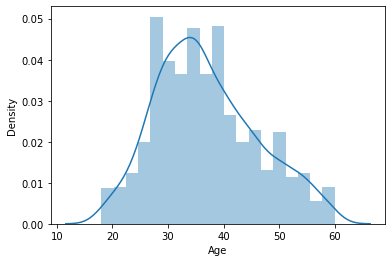

In [95]:
#checking distribution for cols.
sns.distplot(df["Age"])  

In [34]:
#splitting data
x=df.drop("Attrition", axis=1)
y=df["Attrition"]

In [35]:
#target col. analysis
df["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

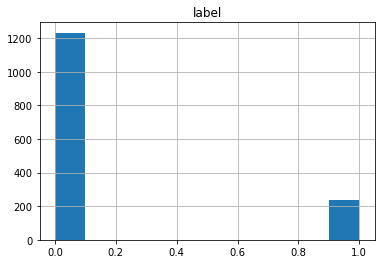

In [36]:
#univariate analysis
df["Attrition"].hist(grid=True)
plt.title('label')
plt.show

In [37]:
#Handling Imbalance by oversampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [38]:
#again checking target col.
y_over.value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

In [39]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [40]:
#finding best random State
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc= accuracy_score(y_test, predf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is", maxAcc, "on Random_state", maxRS)

Best accuracy is 0.907608695652174 on Random_state 120


In [41]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=maxRS)

In [42]:
#model building-Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
prelr = LR.predict(x_test)
print(accuracy_score(y_test,prelr))
print(confusion_matrix(y_test,prelr))
print(classification_report(y_test,prelr))

0.8979591836734694
[[369  11]
 [ 34  27]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       380
           1       0.71      0.44      0.55        61

    accuracy                           0.90       441
   macro avg       0.81      0.71      0.74       441
weighted avg       0.89      0.90      0.89       441



In [43]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7709750566893424
[[316  64]
 [ 37  24]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       380
           1       0.27      0.39      0.32        61

    accuracy                           0.77       441
   macro avg       0.58      0.61      0.59       441
weighted avg       0.81      0.77      0.79       441



In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf= rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8684807256235828
[[371   9]
 [ 49  12]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       380
           1       0.57      0.20      0.29        61

    accuracy                           0.87       441
   macro avg       0.73      0.59      0.61       441
weighted avg       0.84      0.87      0.84       441



In [45]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7709750566893424
[[316  64]
 [ 37  24]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       380
           1       0.27      0.39      0.32        61

    accuracy                           0.77       441
   macro avg       0.58      0.61      0.59       441
weighted avg       0.81      0.77      0.79       441



In [46]:
#for validation
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR, x, y, cv=3)
print("Cross validation score of LogisticRegression model :", scr.mean())

Cross validation score of LogisticRegression model : 0.8680272108843538


In [47]:
scr=cross_val_score(dt, x, y, cv=3)
print("Cross validation score of DecisionTree model :", scr.mean())

Cross validation score of DecisionTree model : 0.8006802721088434


In [48]:
scr=cross_val_score(rf, x, y, cv=3)
print("Cross validation score of RandomForest model :", scr.mean())

Cross validation score of RandomForest model : 0.8585034013605443


In [49]:
scr=cross_val_score(svc, x, y, cv=3)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.8612244897959184


In [50]:
#Best model Hypertunning
from sklearn.model_selection import GridSearchCV

In [107]:
#Random Forest Classifier
parameters = {'n_estimators' :[200, 700],
            'max_features': ['auto', 'sqrt','logz'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini', 'entropy']}

In [108]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=3)

In [111]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'logz'],
                         'n_estimators': [200, 700]})

In [112]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 700}

In [114]:
mod=RandomForestClassifier(criterion='gini', max_depth=7, max_features='auto', n_estimators= 700)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

87.07482993197279


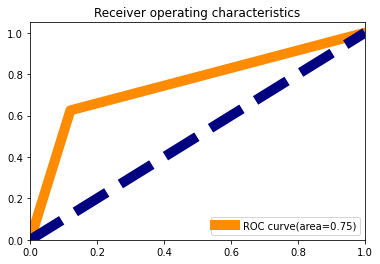

In [115]:
#AUC_ROC Curve
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=10,label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [116]:
#saving model
import joblib
joblib.dump(mod,"HR_Analytics.pkl")

['HR_Analytics.pkl']